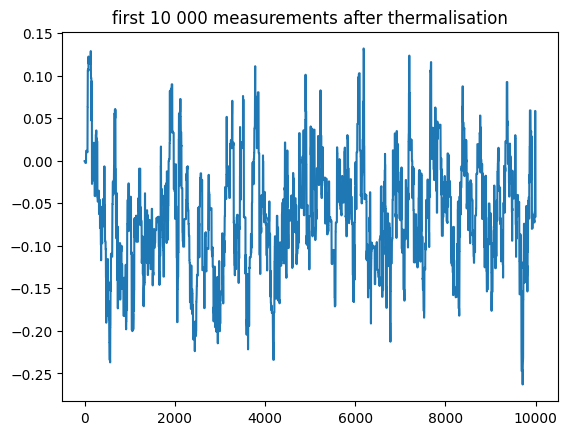

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.loadtxt("timeseries_cos.csv")

# discard first 500k samples
burn = 20000
x = x[burn:]

# quick visual check
plt.plot(x[:10_000])
plt.title("first 10 000 measurements after thermalisation")
plt.show()


In [4]:
def tau_int(series, max_lag=1000):
    y = series - series.mean()
    ac = np.correlate(y, y, mode="full")
    ac = ac[len(ac)//2:] / ac[len(ac)//2]
    window = np.where(ac < 0)[0][0]   # first zero crossing
    return 0.5 + ac[1:min(window, max_lag)].sum()

tau = tau_int(x)
print(f"tau_int ≈ {tau:.1f} sweeps")


tau_int ≈ 249.6 sweeps


In [5]:
thin = x[:: int(2*tau) ]
n_eff = len(thin)
print("independent samples =", n_eff)


independent samples = 121


In [7]:
cos_mean = thin.mean()
cos_err  = thin.std(ddof=1)/np.sqrt(n_eff)
n_links = 28
chi = n_links * thin.var(ddof=1)
chi_err = chi * np.sqrt( 2/(n_eff-1) )     # honest error bar

print(f"<cos θ> = {cos_mean:.4f} ± {cos_err:.4f}")
print(f"χ        = {chi:.4f} ± {chi_err:.4f}")


<cos θ> = -0.0389 ± 0.0064
χ        = 0.1408 ± 0.0182
